In [1]:
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from dataset import KORDataset
from torch.utils.data import DataLoader

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [4]:
import argparse                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

parser = argparse.ArgumentParser()

parser.add_argument('--device',type=str,default='cuda:0',help='')
parser.add_argument('--data',type=str,default='./total_solar_weather_pm_2013_2020.npy',help='data path')
parser.add_argument('--batch_size',type=int,default=64,help='batch size')
parser.add_argument('--seq_len',type=int,default=24,help='seq len')

args = parser.parse_args(args=[])

In [5]:
def load_data():
    data = np.load('total_solar_weather_pm_2013_2020.npy', allow_pickle=True)
    return data

In [19]:
data = load_data()

In [6]:
proj_dir = os.getcwd()
conf_fp = os.path.join(proj_dir, 'config.yaml')
with open(conf_fp, encoding='UTF8') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [8]:
features_used = [
      "발전률",
      "지점",                       
      "기온(°C)", 
      "강수량(mm)", 
      "풍속(m/s)", 
      "풍향(16방위)", 
      "습도(%)", 
      "증기압(hPa)", 
      "이슬점온도(°C)", 
      "현지기압(hPa)", 
      "해면기압(hPa)", 
      "일조(hr)", 
      "일사(MJ/m2)", 
      "적설(cm)", 
      "3시간신적설(cm)", 
      "전운량(10분위)", 
      "중하층운량(10분위)", 
      "운형(운형약어)", 
      "최저운고(100m )", 
      "시정(10m)", 
      "지면상태(지면상태코드)", 
      "현상번호(국내식)", 
      "지면온도(°C)", 
      "5cm 지중온도(°C)", 
      "10cm 지중온도(°C)", 
      "20cm 지중온도(°C)", 
      "30cm 지중온도(°C)",
      "지역",                     
      "망",
      "측정소코드",
      "측정소명",
      "측정일시",                
      "SO2",
      "CO",
      "O3",
      "NO2",
      "PM10",
      "PM25",
      "주소"
  ]

In [9]:
location_var = config['experiments']['location_used']
weather_var = config['experiments']['features_used']

In [10]:
loc_list = [location_var.index('부산복합1단계'), location_var.index('인천수산정수장'), location_var.index('하동본부')]
weather_list = [weather_var.index('발전률'), weather_var.index('기온(°C)'),weather_var.index('강수량(mm)'), weather_var.index('PM10')]

In [9]:
temp = data[loc_list][:, :, weather_list]

NameError: name 'data' is not defined

In [29]:
np.save('busan_incheon_hadong_solarratio_temp_pre_pm_2013_2020.npy', temp)

In [11]:
from dataset import KORDataset
busan_dataset = KORDataset(seq_len=args.seq_len, locals=[0])
busan_dataset = KORDataset(seq_len=args.seq_len, locals=[0])

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
temp = np.array([[1,2,3,4], [5,6,7,8],[7,8,9,1],[2,5,3,1]])
scaler = MinMaxScaler()
print(temp, '\n', scaler.fit_transform(temp))

[[1 2 3 4]
 [5 6 7 8]
 [7 8 9 1]
 [2 5 3 1]] 
 [[0.         0.         0.         0.42857143]
 [0.66666667 0.66666667 0.66666667 1.        ]
 [1.         1.         1.         0.        ]
 [0.16666667 0.5        0.         0.        ]]


In [34]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "import numpy as np\nimport pandas as pd\nimport yaml\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport os\nget_ipython().run_line_magic('matplotlib', 'inline')",
  'import torch\nimport torch.nn as nn\nimport torch.optim as optim',
  'from dataset import KORDataset\nfrom torch.utils.data import DataLoader',
  "import argparse                                                                                                                                                                                                                                                                                                                                                                                           

In [30]:
scaler.transform(np.array([[1,3,2,4],[4,2,3,0]]))

array([[ 0.        ,  0.16666667, -0.16666667,  0.42857143],
       [ 0.5       ,  0.        ,  0.        , -0.14285714]])

In [18]:
from torch.utils.data import DataLoader

# for idx, temp_data in enumerate(DataLoader(torch.FloatTensor(temp_prec_data[0].astype(float)), batch_size=4)):
#     print(idx, temp_data)
train_loader = DataLoader(busan_dataset, batch_size=32, drop_last=True)
for batch_idx, data in enumerate(train_loader):
    print(batch_idx, data.shape)

0 torch.Size([32, 24, 3])
1 torch.Size([32, 24, 3])
2 torch.Size([32, 24, 3])
3 torch.Size([32, 24, 3])
4 torch.Size([32, 24, 3])
5 torch.Size([32, 24, 3])
6 torch.Size([32, 24, 3])
7 torch.Size([32, 24, 3])
8 torch.Size([32, 24, 3])
9 torch.Size([32, 24, 3])
10 torch.Size([32, 24, 3])
11 torch.Size([32, 24, 3])
12 torch.Size([32, 24, 3])
13 torch.Size([32, 24, 3])
14 torch.Size([32, 24, 3])
15 torch.Size([32, 24, 3])
16 torch.Size([32, 24, 3])
17 torch.Size([32, 24, 3])
18 torch.Size([32, 24, 3])
19 torch.Size([32, 24, 3])
20 torch.Size([32, 24, 3])
21 torch.Size([32, 24, 3])
22 torch.Size([32, 24, 3])
23 torch.Size([32, 24, 3])
24 torch.Size([32, 24, 3])
25 torch.Size([32, 24, 3])
26 torch.Size([32, 24, 3])
27 torch.Size([32, 24, 3])
28 torch.Size([32, 24, 3])
29 torch.Size([32, 24, 3])
30 torch.Size([32, 24, 3])
31 torch.Size([32, 24, 3])
32 torch.Size([32, 24, 3])
33 torch.Size([32, 24, 3])
34 torch.Size([32, 24, 3])
35 torch.Size([32, 24, 3])
36 torch.Size([32, 24, 3])
37 torch.Si

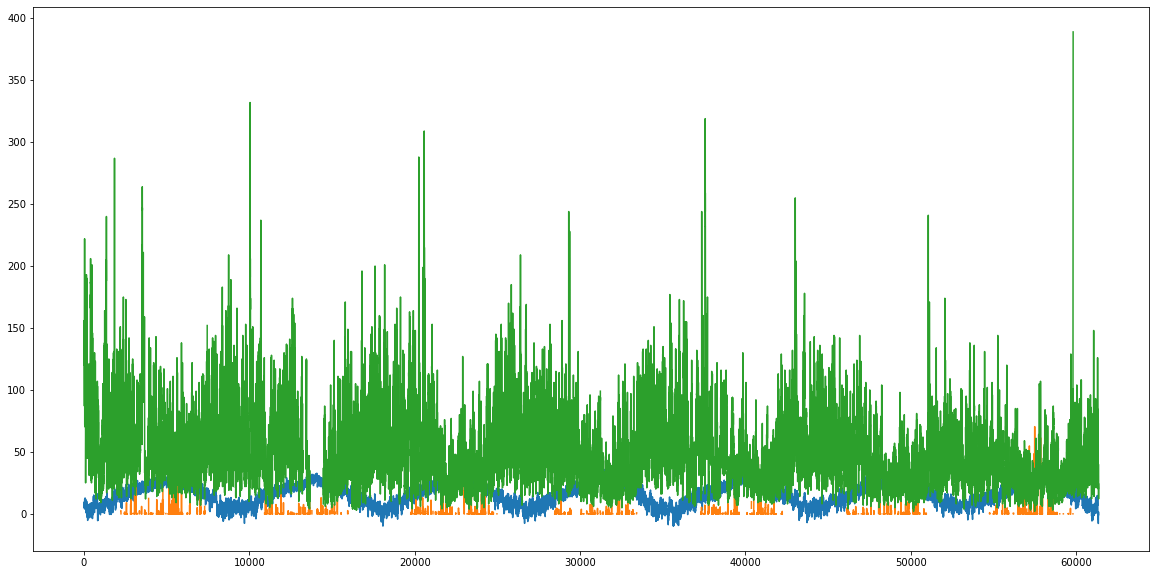

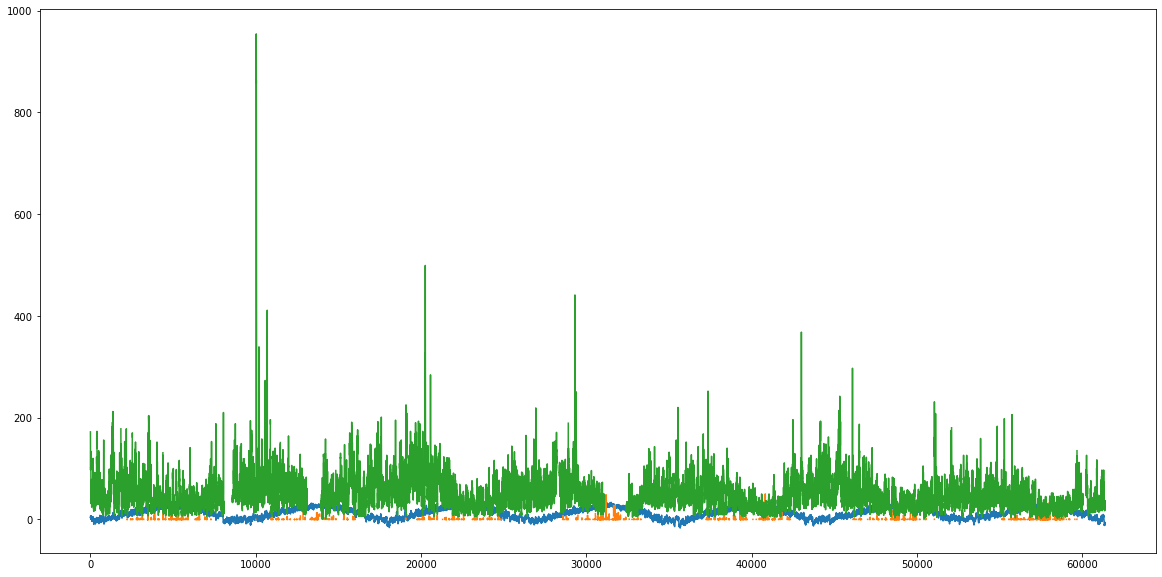

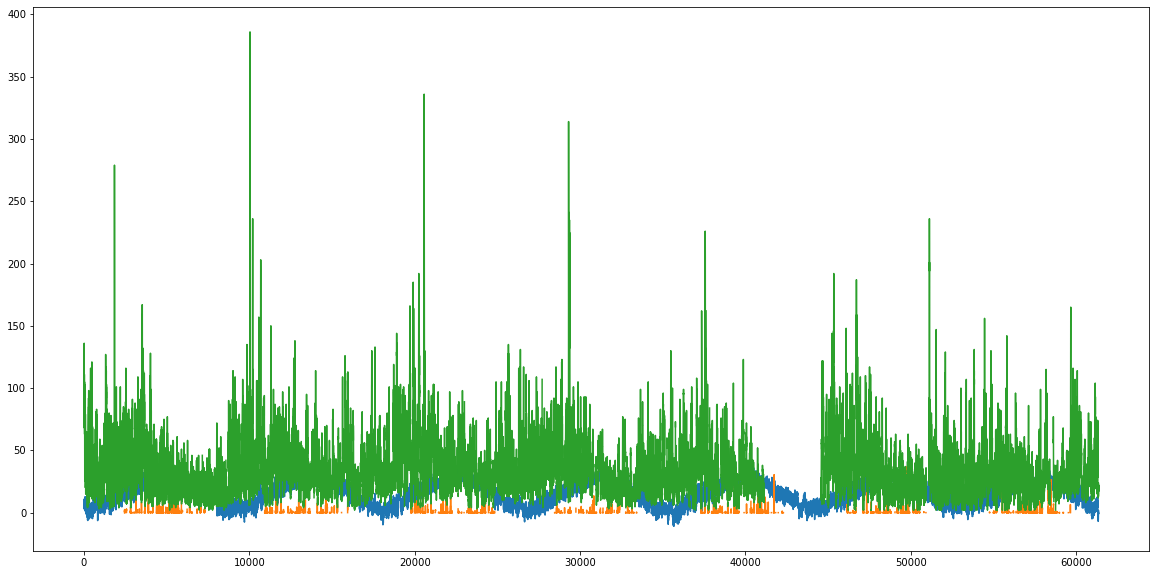

In [177]:
for i in range(3):
    plt.figure(figsize=(20,10))
    plt.plot(temp_prec_data[i])  #부산, 인천, 하동


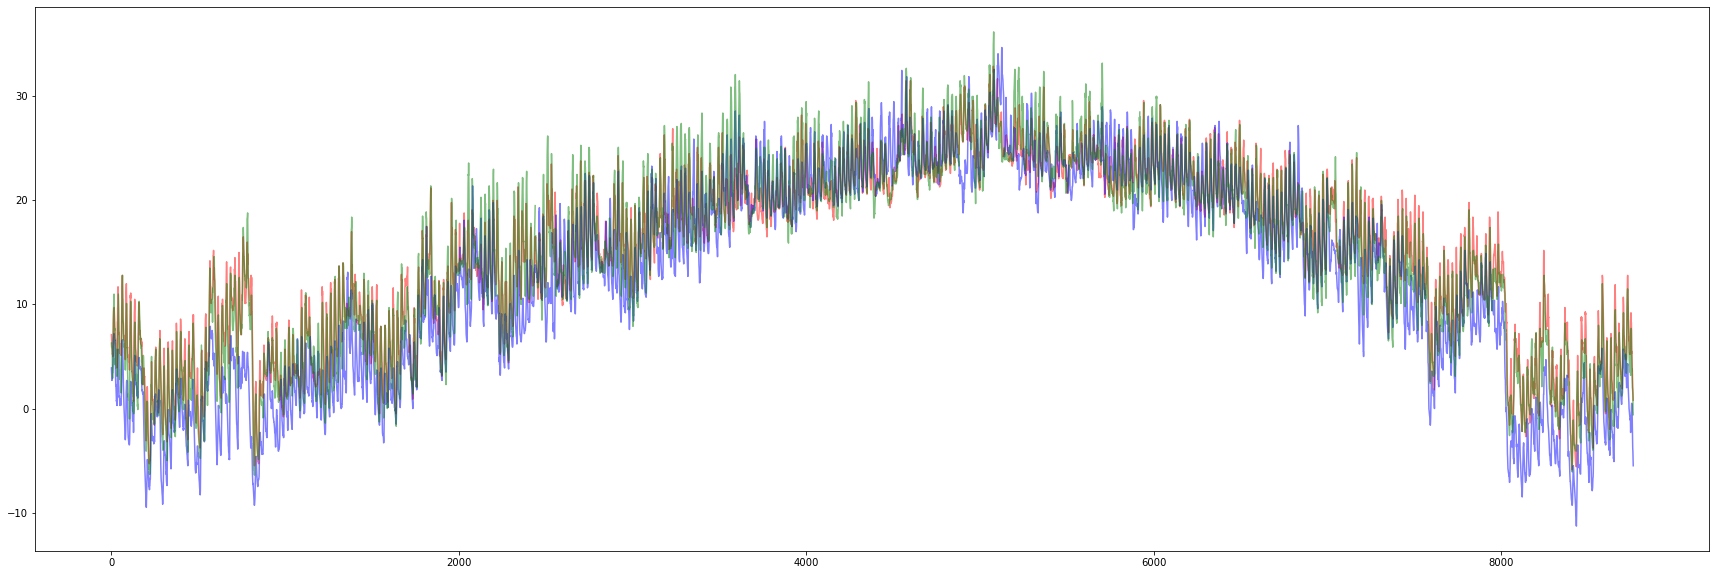

In [194]:
plt.figure(figsize=(30,10))
plt.plot(busan_weather[:8760,0],c='r', alpha=0.5)
plt.plot(incheon_weather[:8760,0], c='b', alpha=0.5)
plt.plot(hadong_weather[:8760,0], c='g', alpha=0.5)

In [195]:
import dtw

In [264]:
def get_nonan_mean(arr):
    return np.mean(arr[~np.isnan(arr.astype(float))]).round(1)
# np.mean(busan_weather[:8760,2][~np.isnan(busan_weather[:8760,2].astype(float))]).round(1)

In [286]:
# ffill along axis 1, as provided in the answer by Divakar
def ffill(arr):
    mask = np.isnan(arr)
    idx = np.where(~mask, np.arange(mask.shape[1]), 0)
    np.maximum.accumulate(idx, axis=1, out=idx)
    out = arr[np.arange(idx.shape[0])[:,None], idx]
    return out

# Simple solution for bfill provided by financial_physician in comment below
def bfill(arr): 
    return ffill(arr[:, ::-1])[:, ::-1]

In [315]:
def get_dtw_distance(array1, array2, seq_start, seq_end, idx):
    '''
    1차원 벡터 두 개, 기간, feature index 받아서
    ffill, bfill로 nan값 처리 후 dtw 값 반환
    '''
    arr1 = array1[seq_start:seq_end, idx].astype(float)
    arr2 = array2[seq_start:seq_end, idx].astype(float)
    if idx==1:
        arr1 = np.nan_to_num(arr1, nan=0.0)
        arr2 = np.nan_to_num(arr2, nan=0.0)
    else:
        arr1 = bfill(ffill(np.expand_dims(arr1, axis=0)))
        arr2 = bfill(ffill(np.expand_dims(arr2, axis=0)))
        
    return dtw.dtw(arr1, arr2, keep_internals=True)
    

In [373]:
temp0 = get_dtw_distance(busan_weather, incheon_weather, 0, 8760, 0)    #다름
temp1 = get_dtw_distance(busan_weather, hadong_weather, 0, 8760, 0)     #비슷
temp2 = get_dtw_distance(incheon_weather, hadong_weather, 0, 8760, 0)   #다름


In [398]:
dtw_result = np.zeros(shape=(3,3,3))

In [395]:
weather_data = [busan_weather, incheon_weather, hadong_weather]

In [431]:
dtw_result = np.zeros(shape=(3,3,3))
weather_data = [busan_weather, incheon_weather, hadong_weather]
for i in range(3):
    for j in range(3):
        for k in range(3):
            if j > i:
                dtw_result[i,j,k] = get_dtw_distance(weather_data[i], weather_data[j], 8760, 2*8760, k).normalizedDistance


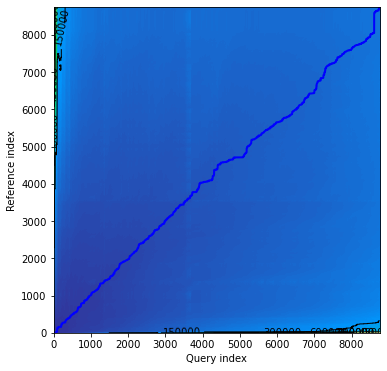

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [358]:
dtw.dtwPlot(temp0, 'density')

In [377]:
temp2.normalizedDistance

0.7544406392694147

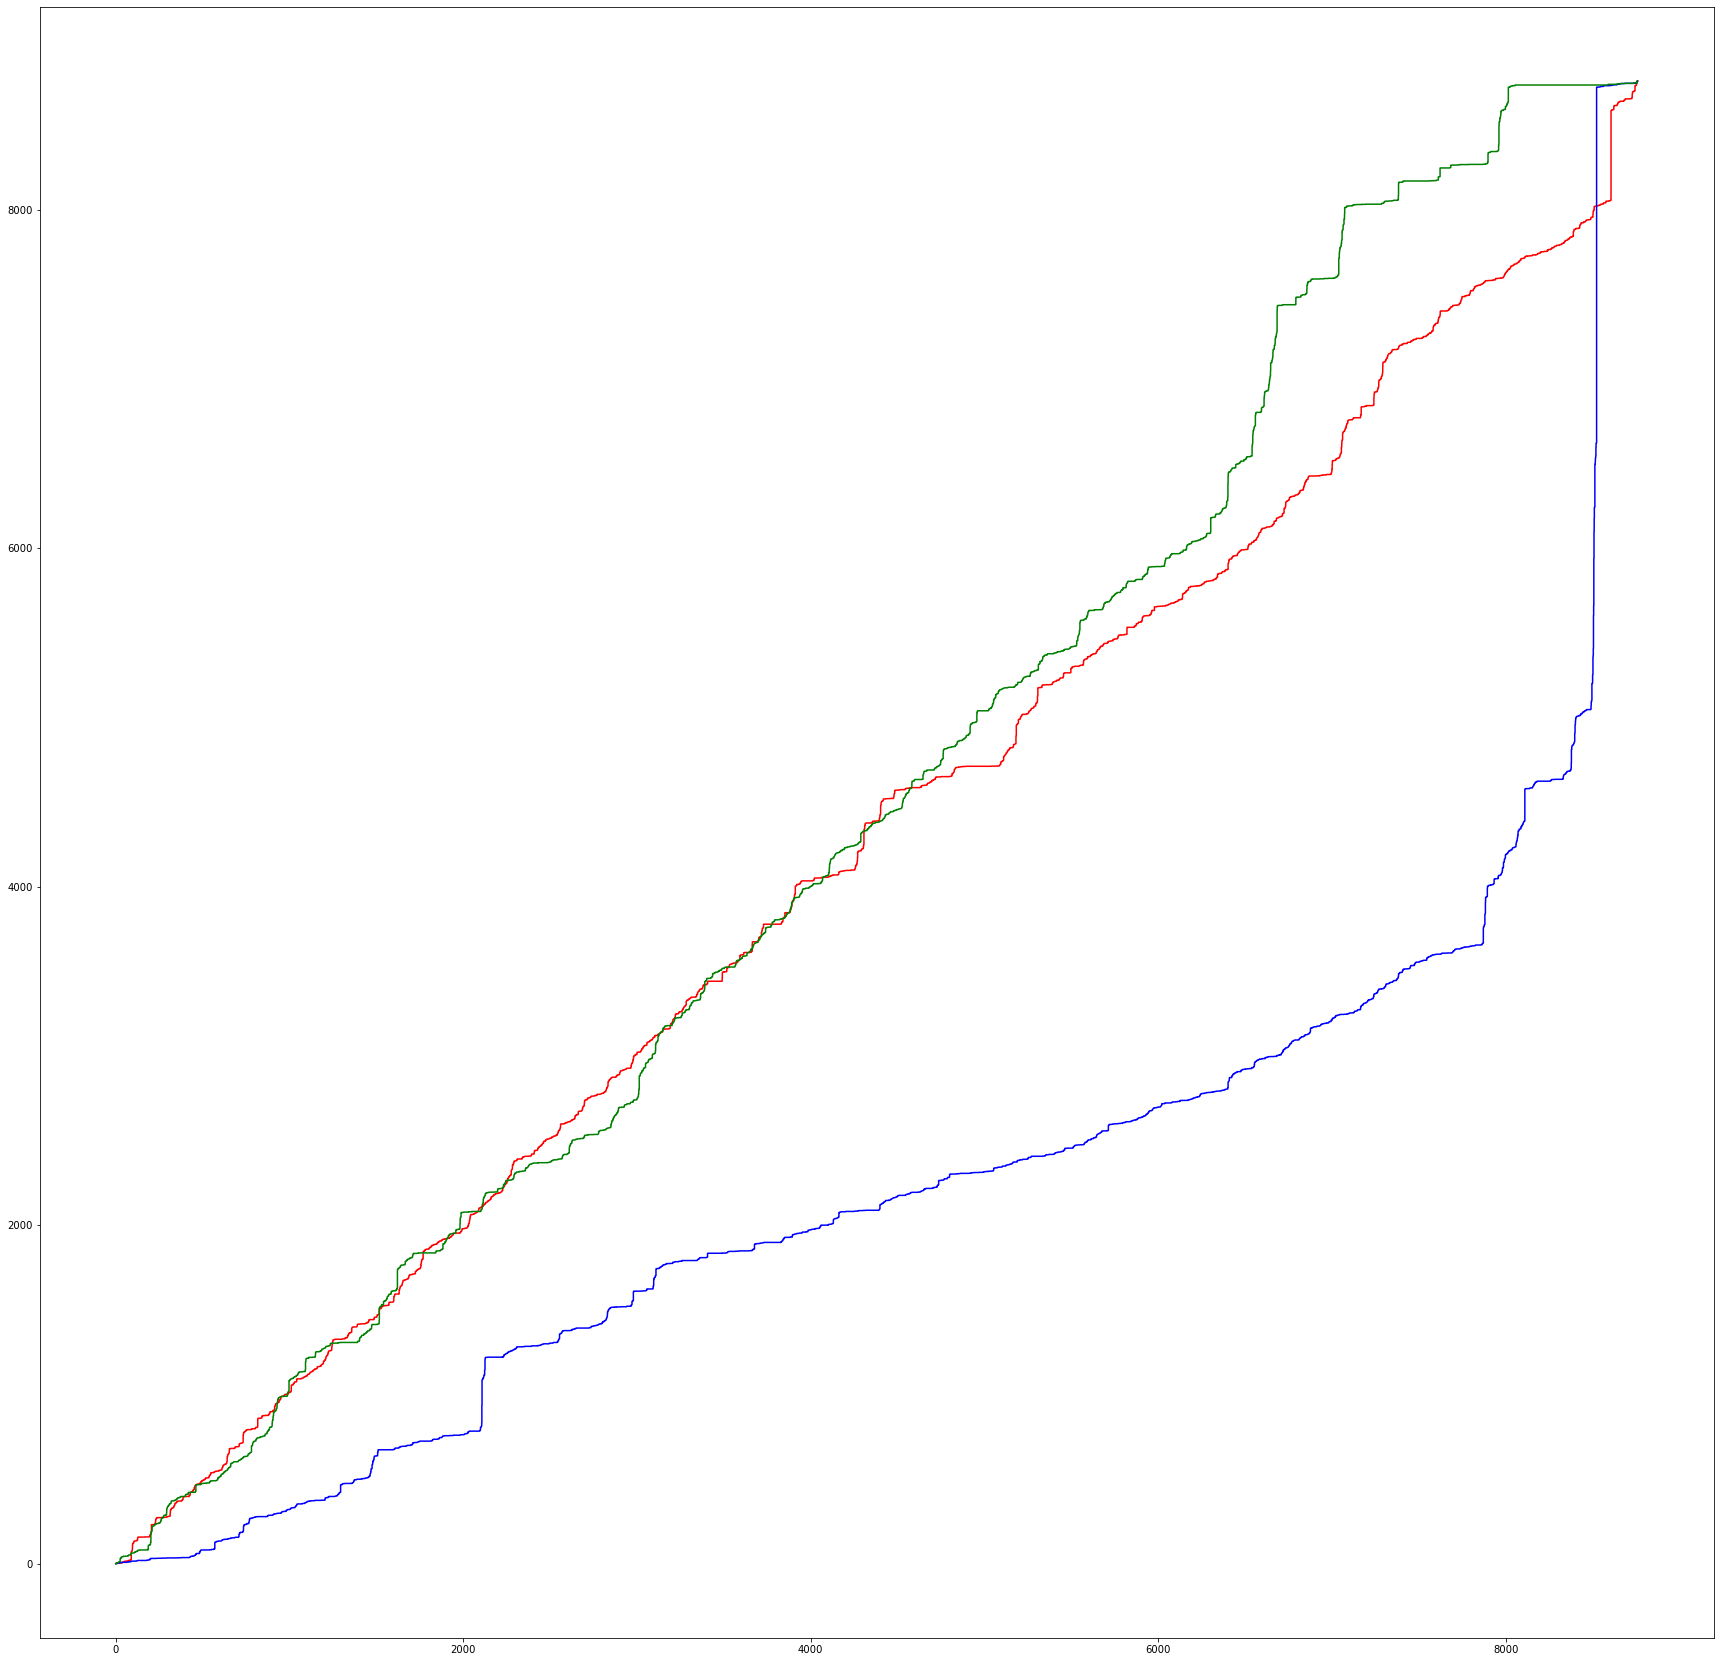

In [354]:
plt.figure(figsize=(30,30))
plt.plot(temp0.index1, temp0.index2, 'r')
plt.plot(temp1.index1, temp1.index2, 'b')
plt.plot(temp2.index1, temp2.index2, 'g')

13049.900000000347

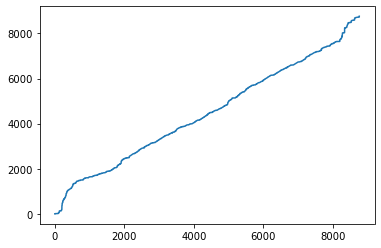

In [263]:
plt.plot(temp.index1, temp.index2)
temp.distance

<Figure size 2160x720 with 0 Axes>

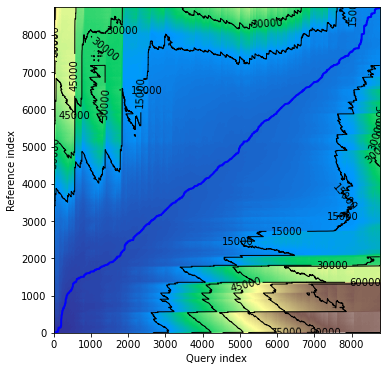

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [246]:
plt.figure(figsize=(30,10))
dtw.dtw(busan_weather[:8760,0].astype(float), incheon_weather[:8760,0].astype(float), keep_internals=True).plot(type='density')

In [553]:
for idx, data in enumerate(DataLoader(torch.FloatTensor(dataset[0]), batch_size=4)):
        print(idx, data)

0 tensor([[-2.3000,     nan, 40.0000],
        [-2.4000,     nan, 39.0000],
        [-2.5000,     nan, 47.0000],
        [-2.0000,     nan, 42.0000]])
1 tensor([[-2.3000,     nan, 42.0000],
        [-2.5000,     nan, 53.0000],
        [-2.7000,     nan, 45.0000],
        [-2.6000,     nan, 55.0000]])
2 tensor([[-2.4000,     nan, 65.0000],
        [ 1.1000,     nan, 77.0000],
        [ 2.4000,     nan, 75.0000],
        [ 5.4000,     nan, 88.0000]])
3 tensor([[ 6.7000,     nan, 58.0000],
        [ 6.2000,     nan, 55.0000],
        [ 7.7000,     nan, 69.0000],
        [ 7.5000,     nan, 73.0000]])
4 tensor([[  6.3000,      nan,  73.0000],
        [  5.1000,      nan, 126.0000],
        [  4.3000,      nan, 176.0000],
        [  3.6000,      nan, 141.0000]])
5 tensor([[  3.7000,      nan, 148.0000],
        [  3.5000,      nan, 153.0000],
        [  2.8000,      nan, 151.0000],
        [  2.4000,      nan, 150.0000]])
6 tensor([[  2.3000,      nan, 149.0000],
        [  2.1000,      nan,

KeyboardInterrupt: 